In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Libraries and functions

In [835]:
import numpy as np
import pandas as pd
import pandasql as ps
from pandas import Series, DataFrame
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib as mpl
import sys
import time
import math
from tqdm import tqdm
from importlib import reload
from os.path import join, normpath
from bs4 import BeautifulSoup
import os
from os import path
import roamability as rb
import re

downloads = 'C:/Users/balob/Downloads'

#### To get the path

In [95]:
from pathlib import Path
path_dir = Path.cwd()
print(path_dir)
path_dir

C:\Users\balob\Documents\GITLAB\RB_BD


WindowsPath('C:/Users/balob/Documents/GITLAB/RB_BD')

In [3]:
pwd=!echo %cd%
pwd=str(pwd)
pwd=r"c:\Users\balob\Documents\GITLAB\NOC_Roamability_com\noc\noc"
pwd.replace('\\','/',100)

'c:/Users/balob/Documents/GITLAB/NOC_Roamability_com/noc/noc'

In [99]:
%reset -f

# Examples

### MS SQL request

In [206]:
sql_srt='SELECT TOP(5) * FROM USAGE_TYPE;'
with rb.MssqlConnect('172.18.11.82', '10028', 'BSS', 'iKQVm40AZAmyRaw72LeY') as cnxn:
    df = pd.read_sql_query(sql_srt, cnxn, coerce_float=False)

### DMI Oracle request

In [ ]:
import cx_Oracle
con = cx_Oracle.connect('DMI/dd607605ce341@DMI_TEST')
# con = cx_Oracle.connect('DMI/dd607605ce341@DMI')
print(con.version)
cur = con.cursor()
cur.execute('SELECT COUNT(*) FROM S_IMSI')
for result in cur:
    print(result)
cur.close()
con.close()

### Soap API OCS Portal

In [278]:
# %reset -f
from zeep import Client
from zeep.wsse.username import UsernameToken

connect = input("Choose connection (prod or lab):")

if connect == 'lab':
    user = 'lab_api@roamability.com'
    user = 'api@cellact.com'
    password = '25D55AD283AA400AF464C76D713C07AD' #Lab
#     password = 'FAC4EC08B5FC0CCF8145BB79E8F24F47' #Lab
    api_link = 'https://172.20.39.7:8585/ocsapi/roamability/api/roamability.wsdl' #Lab
    api_link = 'https://labocsapi.roamability.com:6443/ocsapi/roamability/api/roamability.wsdl'
elif connect == 'prod':
    user = 'prod_api@roamability.com'
    password = '25D55AD283AA400AF464C76D713C07AD'
#     api_link = 'https://ocsapi.roamability.com:7443/ocsapi/roamability/api/roamability.wsdl'
#     api_link = 'https://ocsapi.roamability.com:7443/ocsapi/roamability/api/'
    api_link = 'https://ocsapi2.roamability.com:7443/ocsapi/roamability/api/roamability.wsdl'
#     api_link = 'http://172.20.35.10:8585/ocsapi/roamability/api/roamability.wsdl'
#     api_link = 'http://172.20.35.12:8585/ocsapi/roamability/api/roamability.wsdl'

user_name_token = UsernameToken(user, password)
user_name_token.use_digest = True
client = Client(api_link, wsse=user_name_token)

reseller = client.service.getResellerInfo()
accounts = client.service.getAccounts()

if reseller.result.code == '1':
    print('You are connected to Reseller: {}.\
    \nAvailable credit for the Reseller: {:.0f} USD.\n'.\
    format(reseller.reseller.resellerName,reseller.reseller.availableCredit))
else:
    print('Error in getting Reseller info: {}'.format(reseller.result.description))

if accounts.result.code == '1':
    accounts_dict = {account.accountId:account.accountName for account in accounts.accounts.accounts}
    print('The Reseller contains the following accounts:')
    for i,[account_id,account_name] in enumerate(accounts_dict.items()):
        print(' {:<5}{} (accountID: {})'.format(i,account_name,account_id))
else:
    print('Error in getting Account info: {}'.format(accounts.result.description))

# Subscriber in lab in STI account
#subscriber_id = client.service.getSubscriberById('934420')
#subscriber_iccid = client.service.getSubscriberByICCID('8997219121000031446')
# client.service.getSubscriberPrePaidPackages('831882', 1)
#client.service.getSubscriberByIMSI('425019613023160')
#client.service.getSubscriberById('209287')
#client.service.getSubscriberByICCID('8997219121000022660')
# client.service.assignSubscriberPrePaidPackage('831882', 1, dt.datetime.strptime('2019-07-07','%Y-%m-%d'))
# client.service.getSubscriberPrePaidPackages('937939', 1)
#subscriber_id

Choose connection (prod or lab):prod
You are connected to Reseller: Roamability Test RT.    
Available credit for the Reseller: 3572 USD.

The Reseller contains the following accounts:
 0    Roamability-Porto Test (accountID: 352332)
 1    Telzar Relay test (accountID: 352341)
 2    Roamability - SMPP TEST  (accountID: 352343)
 3    Telzar Relay (accountID: 352344)
 4    Roamability Test Sim-cards (accountID: 352349)
 5    Roamability MIFI Test (Denis) (accountID: 352415)
 6    RB Test hosted GGSN KR (accountID: 352424)
 7    DID's  (accountID: 352441)
 8    RB MiFi test account (accountID: 352446)
 9    soapApiTest (accountID: 352447)
 10   uCloudLink RB Test (accountID: 352448)
 11   Verint  (Roy's test) (accountID: 352471)
 12   Antoloy ( Roy's test) (accountID: 352472)
 13   Sure sample cards (accountID: 352479)
 14   Old Partner RT (accountID: 352527)
 15   Old Partner RT (accountID: 352528)
 16   aaa (accountID: 352529)
 17   Michael D test delete (accountID: 352531)
 18   Sigos 

### Send MSU

In [10]:
from bs4 import BeautifulSoup
import roamability as rb
#reload(rb)

switch_01_payload = '24027000001f0d00010000bfff0100000000000010554f212dbbad49a1caf2573e1a626139'
switch_02_payload = '24027000001F0D00010000BFFF0100000000000040a740AD174703383798A7A6545BB36491'

#515030190000000
#1d46acf860780
add_imsi_03 = '3C02700000370d00210000bfff0100000000000040939360c23f417f147557b6940c91ba8b7e54be1c8c950a6ed1235ea8e3d70e9c2d7c34876abd68ec'


ogt = {'p4':'48790993070',
       'partner':'97254120624',
       'sure':'447797706411',
       'tot':'66893773228',
       'porto_seguro':'550549900000',
       'rusec_rus':'79028710069',
       'rusec_int':'417999880000024',
       'multi_byte_sponsor':'85263347864',
       'smart1':'639180009880',
       'smart2':'639180009881',
       'smart3':'639180009882',
       'smart4':'639180009883',
       'telzar':'972559900040',
       'x2one':'972553316228', #972553316240 -972553316245
       'cellact':'972557016315',
       'netmore':'46731726312',
       'p4_naka_01':'48790998145',
       'p4_naka_02':'48790998146',
       'p4_naka_03':'48790998147',
       'partner_naka_01':'97254120634',
       'partner_naka_02':'97254120635',
       'partner_naka_03':'97254120636',
       'partner_naka_04':'97254120637',
       'mb':'852633477591',
       'maxcom':'525575709019',
       'orange':'48507909001',
       'jt':'447797707084'}

rb.greetings_func()
#rb.print_imsi_prof(ogt, imsi, msc, 'as_resp') #'as_mo'
#soup = BeautifulSoup(rb.sri4sm(ogt, msisdn),'xml') #250359000007598 79028710043
#soup = BeautifulSoup(rb.prn(ogt, dgt, imsi),'xml')
#soup = BeautifulSoup(rb.sai(ogt, dgt, imsi, node),'xml') # 0 - vlr; 16 - mme
# soup = BeautifulSoup(rb.sendSMS(ogt, imsi, msc, rb.get_info),'xml')
#soup = BeautifulSoup(rb.cl(ogt, dgt, imsi, d_ssn=7),'xml')
#soup

Greetings from Roamability!!! 



In [227]:
# soup = BeautifulSoup(rb.cl('48790993070', '46708000031', '260060148993323', d_ssn=7),'xml')
soup = BeautifulSoup(rb.cl('48790993070', '79037019999', '260060142036105', d_ssn=7),'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response>
<result>0</result>
<src_gt>79037019999</src_gt>
</response>

In [19]:
get_info    = "24027000001F0D00010000BFFF01000000000000102F978372C730834EF445172BD26B8C8F"
get_info    = "027000001F0D00010000BFFF01000000000000102F978372C730834EF445172BD26B8C8F"
get_info_mo = "027000001F0D00210000BFFF01000000000000102F978372C730834EF445172BD26B8C8F"
switch_01_payload = '027000001f0d00010000bfff0100000000000010554f212dbbad49a1caf2573e1a626139'
switch_02_payload = '027000001F0D00010000BFFF0100000000000040a740AD174703383798A7A6545BB36491'

In [24]:
# reload(rb)
rb.greetings_func()
rb.print_imsi_prof('48790993070', '260060148993323', '46708000031', 'as_resp') #'as_mo' 'as_resp'

Greetings from Roamability!!! 

<bound method Tag.prettify of <?xml version="1.0" encoding="utf-8"?>
<response>
<result>0</result><response/>
<src_gt>46708000031</src_gt>
</response>> 

This SIM card contains the following IMSIs:


In [14]:
rb.switch_02_payload

'027000001F0D00010000BFFF0100000000000010F5375954EF29FB9A7F41ADE8444236A3'

In [389]:
reload(rb)
s = '00350abfff0100000000000000fffffff00001070052f0200000003a155608057823070008495210693100112901082906601094001129'
s = r'00077FF644027100003F0ABFFF0100000000000000FFFFFFF00001070232F4010000003A95940448388403000849528100020000500108495210690210620102082906601004803854'
s = r'00077FF644027100003F0ABFFF0100000000000000FFFFFFF0000107020000000100033A75350738900608000849528100020000600108495210690210139702082906601004901438'
s = r'00077FF644027100003F0ABFFF0100000000000000FFFFFFF00001070025F0510000003A55130828920808000859025111106202550108495210690210749802082906601004114330'
s = r'00077FF644027100003F0ABFFF0100000000000000FFFFFFF00001070052F0200000008A56780943745100000849521069310050630108290660109400506303085951301009000000'
s = r'00077FF644027100003F0ABFFF0100000000000000FFFFFFF00001070252F0100000008A56780943745100000849521069310050630108290660109400506302084945302072039929'
s = r'00530abfff0100000000000000fffffff00001070115f5200000003a353009591638050008495291211011038501084952106992583165020829066010041024220308494530207203001104085951301009000020'

s = r'003f0abfff0100000000000000fffffff0000107011300140000003a45920509893807000849521069314098990108290660109440479902085951301009000090'

rb.decode_payload_response(s)

This SIM card contains the following IMSIs:
Slot 0 425019613048999
Slot 1 260060149047499
Slot 2 515030190000009

Applet ver.: 1.7.1
MCCMNC: 31041


In [17]:
import http
import re
from bs4 import BeautifulSoup
import sys

ss7_url = "172.18.11.10"
ss7_path = "/cgi-bin/ss7gw.fcgi"

def executeHTTP(request, url, path):
    client = http.client.HTTPConnection(url)
    client.request("POST", path, request, {"Content-Type": "text/xml"})
    resp = client.getresponse()
    return resp.read()

def sri4sm(ogt, msisdn, dgt):
    req = """<?xml version=\"1.0\"?>
        <ss7gw request=\"SRI_SM\">
        <d_ssn>6</d_ssn>
        <o_ssn>8</o_ssn>
        <sccp_np>7</sccp_np>
        <o_gt>%s</o_gt>
        <d_gt>%s</d_gt>
        <msisdn>%s</msisdn>
        <priority>1</priority>
        <address>%s</address>
        </ss7gw>""" % (ogt, dgt, msisdn, ogt)
    resp = executeHTTP(req, ss7_url, ss7_path)
    return resp

def sendSMS(ogt, imsi, msc, payload):
    req = """<ss7gw request=\"MTSMS_OTA\">
        <d_ssn>8</d_ssn>
        <o_ssn>8</o_ssn>
        <o_gt>%s</o_gt>
        <d_gt>%s</d_gt>
        <imsi>%s</imsi>
        <password>123</password>
        <sc_number>%s</sc_number>
        <key_id>1</key_id>
        <command>1</command>
        <corr_id>1</corr_id>
        <seed>1122</seed>
        <msisdn>972559300036</msisdn>
        <message>%s</message>
        <sms_imsi>%s</sms_imsi>
        <map>3</map>
        </ss7gw>""" % (ogt, msc, imsi, ogt, payload, imsi)
    resp = executeHTTP(req, ss7_url, ss7_path)
    return resp

def sai(ogt, dgt, imsi, node):
    req = """<?xml version=\"1.0\"?>
          <ss7gw request=\"SAIN\">
          <d_ssn>6</d_ssn>
          <o_gt>%s</o_gt>
          <d_gt>%s</d_gt>
          <o_ssn>7</o_ssn>
          <imsi>%s</imsi>
          <num_req_vec>1</num_req_vec>
          <sccp_np>7</sccp_np>
          <node_type>%s</node_type>
          </ss7gw>""" % (ogt, dgt, imsi, node)
    resp = executeHTTP(req, ss7_url, ss7_path)
    return resp

imsi = 724540540423172
ogt = 97254120624
dgt = 550040540423172
node = 0
soup = BeautifulSoup(
    sai(ogt, dgt, imsi, node)
    ,'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response>
<result>-1</result>
<error>Error: Unknown Subscriber(1)</error>
<src_gt>556181136100</src_gt>
</response>

In [143]:
add_imsi = '02700000370d00210000bfff010000000000007056d7a52e5fcef694ab2c069c00df34b084853aa0a2bf02195723f978ba96ba8b3a4a28b4df531cfe'
soup = BeautifulSoup(sendSMS('972553316228', '425120000003499', '972571209920', add_imsi),'xml') #250359000007598 79028710043
soup

<?xml version="1.0" encoding="utf-8"?>
<response>
<result>-1</result>
<error>timeout</error>
<src_gt/>
</response>

In [291]:
mccmap_payload = '02700000270d00010000bfff0100000000000090dd53b30d1865a9c565c08aaa934e1e64ebb7816a808ecf42'

soup = BeautifulSoup(sendSMS('972557016315', '425180020000008', '972500000601', mccmap_payload),'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response>
<result>0</result><response>00077FF61502710000100ABFFF01000000000000000000004E00</response>
<src_gt>972500000601</src_gt>
</response>

In [494]:
reload(rb)
imsi = 260036610000000
# imsi = 260060169326039
orealm = 'nakamobile.mnc003.mcc260.3gppnetwork.org'
ohost = 'nakahss.nakamobile.mnc003.mcc260.3gppnetwork.org'

drealm = 'epc.mnc020.mcc234.3gppnetwork.org'
dhost = 'node245.epc.mnc020.mcc234.3gppnetwork.org'

mcc = '228'
mnc = '03'
soup = BeautifulSoup(
#     rb.air(imsi, ohost, orealm, drealm, mcc, mnc)
    rb.clr(imsi, ohost, orealm, dhost, drealm)
    ,'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<cla>
<session-id>44533bc64643b7ac88448d9e6369a05d18a0ad92ac950f630d207f95318ee3f2;1580214580;8978515</session-id>
<orig-host>deakat01.mnc003.mcc260.3gppnetwork.org</orig-host>
<orig-realm>epc.mnc020.mcc234.3gppnetwork.org</orig-realm>
<res-code>3002</res-code>
<error-msg>DRL-ERR-3002-312:.</error-msg>
</cla>

In [14]:
import http

S6A_URL = '172.18.11.90'
S6A_PATH = '/cgi-bin/http.fcgi'

def executeHTTP(request, url, path):
    client = http.client.HTTPConnection(url)
    client.request("POST", path, request, {"Content-Type": "text/xml"})
    resp = client.getresponse()
    return resp.read()

def air(imsi, ohost, orealm, drealm, mcc, mnc):
    req = """<?xml version=\"1.0\"?>
         <roam:air xmlns:roam="roamability:gtw:s6a">
         <roam:o-realm>%s</roam:o-realm>
         <roam:o-host>%s</roam:o-host>
         <roam:d-realm>%s</roam:d-realm>
         <roam:imsi>%s</roam:imsi>
         <roam:vplmn  mcc="%s" mnc="%s"/>
         <roam:eutran  numVec="1" immediate="1"/>
         </roam:air>""" % (orealm, ohost, drealm, imsi, mcc, mnc)
    resp = executeHTTP(req, S6A_URL, S6A_PATH)
    return resp

def clr(imsi, ohost, orealm, dhost, drealm):
    req = """<roam:clr proxy="true" xmlns:roam="roamability:gtw:s6a">
          <roam:o-realm>%s</roam:o-realm>
          <roam:o-host>%s</roam:o-host>
          <roam:d-realm>%s</roam:d-realm>
          <roam:d-host>%s</roam:d-host>
          <roam:imsi>%s</roam:imsi>
          <!--Optional:
          <roam:supp-feat vendor="3" list_id="2" list="7"/>-->
          <!--Optional:
          <roam:vendor-specific-app-id vendor-id="7" auth-app-id="7" acct-app-id="7"/>-->
          <!-- MME_UPDATE_PROCEDURE (0)-->
          <!-- SGSN_UPDATE_PROCEDURE (1)-->
          <!-- SUBSCRIPTION_WITHDRAWAL (2)-->
          <!-- UPDATE_PROCEDURE_IWF (3)-->
          <!-- INITIAL_ATTACH_PROCEDURE (4)-->
          <roam:cancel-type>2</roam:cancel-type>
        </roam:clr>""" % (orealm, ohost, drealm, dhost, imsi)
    resp = executeHTTP(req, S6A_URL, S6A_PATH)
    return resp

imsi = 260036610000004
orealm = 'rb.mnc003.mcc260.3gppnetwork.org'
ohost = 'hss.rb.mnc003.mcc260.3gppnetwork.org'

drealm = 'epc.mnc001.mcc250.3gppnetwork.org'
dhost = 'mme.spb.2987.epc.mnc001.mcc250.3gppnetwork.org'
mcc = '234'
mnc = '20'

soup = BeautifulSoup(
#     air(imsi, ohost, orealm, drealm, mcc, mnc)
    clr(imsi, ohost, orealm, dhost, drealm)
    ,'xml')
soup

NameError: name 'ss7_url' is not defined

In [246]:
imsi = 260038800148194
imsi = 260036610000004
orealm = 'rb.mnc003.mcc260.3gppnetwork.org'
ohost = 'hss.rb.mnc003.mcc260.3gppnetwork.org'

orealm = 'epc.mnc001.mcc250.3gppnetwork.org'
ohost = 'mme.spb.2987.epc.mnc001.mcc250.3gppnetwork.org'

drealm = 'epc.mnc003.mcc260.3gppnetwork.org'
mcc = '250'
mnc = '01'
soup = BeautifulSoup(
    air(imsi, ohost, orealm, drealm, mcc, mnc)
    ,'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<aia>
<session-id>5971f1d01bbaaa187db2bc1cc54fd2cee8619578a04ae6bdd6d1f2082780eeda;1572435580;8978525</session-id>
<orig-host>deawar01.mnc003.mcc260.3gppnetwork.org</orig-host>
<orig-realm>epc.mnc003.mcc260.3gppnetwork.org</orig-realm>
<res-code>3002</res-code>
<error-msg>DRL-ERR-3002-205: No routes found. Egress Loop Detected. Route List:DSR_ROAMABILITY.</error-msg>
</aia>

 ### Format output

In [ ]:
import datetime as dt
print( 'start: {} {} :end'.format('one', 'two') ) #start: one two :end
print( 'start: {1} {0} :end'.format('one', 'two') ) #start: two one :end
print( 'start: test {:10} :end'.format('test') ) #start: test test       :end
print( 'start: test {:10} :end'.format(10) ) #start: test         10 :end
print( 'start: test {:>10} :end'.format('test') ) #start: test       test :end
print( 'start: test {:<10} :end'.format('test') ) #start: test test       :end
print( 'start: test {:_<10} :end'.format('test') ) #start: test test______ :end
print( 'start: test {:^10} :end'.format('test') ) #start: test    test    :end
print( 'start: test {:.10} :end'.format('test1test2test3') ) #start: test test1test2 :end
print( 'start: test {:_^10.5} :end'.format('test1test2test3') ) #start: test __test1___ :end
print( 'start: test {:d} :end'.format(42) ) #start: test 42 :end
print( 'start: test {:f} :end'.format(42) ) #start: test 42.000000 :end
print( 'start: test {:06.2f} :end'.format(3.141592) ) #start: test 003.14 :end
print( 'start: test {p[first]} {p[last]} :end'.format(p={'first': 'Jean-Luc', 'last': 'Picard'}) ) #start: test Jean-Luc Picard :end
print( 'start: test {p[4]} {p[5]} :end'.format(p=[4, 8, 15, 16, 23, 42]) ) #start: test 23 42 :end
print( 'start: test {:%Y-%m-%d %H:%M} :end'.format(dt.datetime(2001, 2, 3, 4, 5)) ) #start: test 2001-02-03 04:05 :end

### Search in files by Tags

In [880]:
import roamability as rb
reload(rb)

# Где искать файлы .txt с тегами
paths = ['c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/NOC_HOW_IT_WORKS/',
        'c:/W_DATA_ROAM/МЕТОДИКИ/',
        'c:/W_DATA_ROAM/ПРОЕКТЫ/',
        'c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/NOC_KNOWN_ISSUES/',
        'c:/W_DATA_ROAM/МЕТОДИКИ/_NOC_M_NEW_CONNECTION/',
        'c:/W_DATA_ROAM/ALARMS/',
        'c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/PRICES',
        ]

# Если хотя бы один из тэгов присутствует. Нужно указать минимум один.
any_tags  = ['#reports_bss_usage_mop']
# any_tags  = ['#gy_principle_of_operation']
# any_tags  = ['#ocs_principle_of_operation']
# any_tags  = ['#reports_ocs_usage_mop']
# any_tags  = ['#reports_ocs_subscribers']
# any_tags = ['#epg_principle_of_operation']
# any_tags  = ['#steering_principle_of_operation','#ticket_steering_issue']

# Если все теги присутствуют. Нужно оставить лист пустым [] если нет обязательных тэгов.
all_tags = []

rb.find_files_by_tags(paths, all_tags, any_tags)

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\UsageSponsorReport.txt
----------------------------------------------------------------------------------------------------
#reports_bss_usage_mop
#reports_tariffs_mop
------------------------------
Отчеты по Cost по Споносрам

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\BSS_SQL\Report_BSS_Usage_per_Customer.txt
----------------------------------------------------------------------------------------------------
#reports_bss_usage_mop
------------------------------
(ИСПОЛЬЗОВАТЬ ДЛЯ СУММИРОВАНИЯ)
Отчет по кастомеру/usage_type/month/TADIG/Sponsor
А также запросы из аггрегированных таблиц

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\BSS_SQL\Repo

### Search in ALARMS by folder names

In [885]:
import os

paths = [
         r'c:/W_DATA_ROAM/ALARMS/',
         r'c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/PRICES/',
         r'c:/W_DATA_ROAM/ПРОЕКТЫ/',
         r'c:/W_DATA_ROAM/ПРОЕКТЫ_NEW_CONNECTION/',
        ]

for path in paths:
    names = os.listdir(path)
    [print(normpath(path + name)) for name in names if name.upper().find('MYSMI')!=-1]

### Search in Allowed Lists and others

In [886]:
downloads = 'C:/Users/balob/Downloads'
dmi_allowed_list = 'DMI.dmi_allowed_list_export_Tue_Jan_28_2020.csv'
dmi_netpfx = 'DMI.dmi_netpfx_export_Thu_Jan_09_2020.csv'
bss_usage = 'bss_usage_2019_08.csv' # c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\BSS_SQL\Report_BSS_Usage_per_PLMN.txt

#Like expression for Allowed List
df_al=pd.read_csv(join(downloads, dmi_allowed_list))
df_al['SPONSOR'] = df_al['Sponsor'].replace(to_replace={r'[Pp][Aa][rtner]?[\s\w-]*|^S1_[\s\w-]*':'S1',
                                                        r'[Pp]4[\s\w-]*|^S2_[\s\w-]*':'S2',
                                                        r'[Mm][Bb][\s\w-]*|^S4_[\s\w-]*':'S4',
                                                        r'SMART[\s\w-]*|^S5_[\s\w-]*':'S5'}, regex=True)
df_al.rename({'PLMN code':'TADIG'}, axis=1, inplace=True)

df_usage = pd.read_csv(join(downloads, bss_usage), sep=';')
cols = ['REP_DATE','VPLMN','SPONSOR','MOC','MOC_SMS','DATA']
df_usage = df_usage.pivot_table(values='COST', index=['REP_DATE', 'VPLMN', 'SPONSOR'], columns='USAGE_TYPE').reset_index()[cols]
df_usage.rename({'VPLMN':'TADIG'}, axis=1, inplace=True)
df_usage.columns.name=''

df_al = pd.merge(df_al, df_usage, how='left', on=['SPONSOR','TADIG'])

df_np=pd.read_csv(join(downloads, dmi_netpfx))

In [17]:
df_al.loc[(df_al['TADIG'].str.startswith(tadig, na=False)) &
          (df_al['Sponsor'].str.contains(sponsor, na=False, regex=True, flags=re.I)),
          ['Sponsor','TADIG','REP_DATE','MOC','MOC_SMS','DATA','SPONSOR']].sort_values(by=['Sponsor','TADIG']).SPONSOR.unique()

array(['S2', 'S1'], dtype=object)

In [889]:
sponsor = 'S5_DRIM01_ALL' # Use regular expressions if it's needed
tadig = 'MYS'

df_al.loc[(df_al['TADIG'].str.startswith(tadig, na=False)) &
          (df_al['Sponsor'].str.contains(sponsor, na=False, regex=True, flags=re.I)),
          ['Sponsor','TADIG','REP_DATE','MOC','MOC_SMS','DATA','SPONSOR']].sort_values(by=['Sponsor','TADIG'])

,Sponsor,TADIG,REP_DATE,MOC,MOC_SMS,DATA,SPONSOR


In [147]:
df_al.loc[(df_al['TADIG'].str.startswith(tadig, na=False)) &
          (df_al['Sponsor'].str.contains(sponsor, na=False, regex=True, flags=re.I)),
          ['Sponsor','TADIG','SPONSOR']].sort_values(by=['Sponsor','TADIG']).Sponsor.unique()

array(['MB_DRIM01_ALL', 'P4_DRIM01_ALL', 'Partner_DRIM01_A',
       'S5_DRIM01_ALL'], dtype=object)

In [587]:
plmn = 'AFGAR'
df1 = df_al.loc[(df_al['TADIG'].str.startswith(plmn, na=False)) &
          (df_al['Sponsor'].str.contains('', na=False)), ['Sponsor','TADIG']].sort_values(by=['Sponsor','TADIG'])
df2 = df_np[(df_np.Operator.str.startswith(plmn,na=False))] #.to_csv(join(downloads,'Prefix.csv')) # & (df_np.SSN==7)
display(df1)
display(df2)

,Sponsor,TADIG


,Operator,Prefix,Number/Range,SSN,MCC,MNC
1710,AFGAR,9377,1,7,412,40
1711,AFGAR,9377,1,149,412,40
10772,AFGAR,9377000000,0,1,412,40


In [520]:
str(df_np[(df_np.Prefix.str.startswith('6683',na=False))].Prefix.unique().tolist())
df_np[(df_np.Prefix.str.startswith('849700',na=False))]

,Operator,Prefix,Number/Range,SSN,MCC,MNC
3852,KHMVC,84970085597,1,7,456,8
3853,KHMVC,84970085597,1,149,456,8
8371,PERVT,8497005193,1,7,716,15
8939,PERVT,8497005193,1,149,716,15
10736,PERVT,84970051930,0,1,716,15


### Hex to Dec conversion

In [164]:
hex_int = '0xaa'
hex_int

'0xaa'

In [189]:
dec_str = '170'
bin_str = '1010'
hex_str = 'aa' # '0xaa'
dec_int = 170
bin_int = 0b1010
hex_int = 0xaa
# b: binary (base 2)
# o: octal (base 8)
# d: decimal (base 10)
# x: hexadecimal (base 16)
# Hex to dec
print('Hex to dec')
print(int(hex_str, base=16))
print(f'{hex_int:d}')
# Dec to hex
print('\nDec to hex')
print(hex(dec_int))
print('%x' % dec_int)
print(f'{dec_int:x}')
# Dec to bin
print('\nDec to bin')
print(bin(dec_int)[2:].zfill(8))
print(f'{dec_int:b}')
# Bin to dec
print('\nBin to dec')
print(int(bin_str, base=2))
# Hex to bin
print('\nHex to bin')
print(bin(int(hex_str, base=16))[2:].zfill(8))
print(bin(hex_int)[2:].zfill(16))
print(f'{hex_int:b}')
print(f'{hex_int:0>16b}')
# На базе: "How to Convert a Python String to int" https://realpython.com/convert-python-string-to-int/

Hex to dec
170
170

Dec to hex
0xaa
aa
aa

Dec to bin
10101010
10101010

Bin to dec
10

Hex to bin
10101010
0000000010101010
10101010
0000000010101010


In [224]:
hex_str = 'C9'
dec_str = '2505'
dec_int = 1962
bin_str = '11111110011001'

# Hex to dec
print('Hex to dec')
print(int(hex_str,16))

# Dec to hex
print('Dec to hex')
print(hex(dec_int).upper())
print('%x'.upper() % dec_int)

# Dec to bin
print('Dec to bin')
print(bin(dec_int)[2:].zfill(8))

# Bin to dec
print('Bin to dec')
print(int(bin_str,2))

# Hex to bin
print('Hex to bin')
print(bin(int(hex_str, 16))[2:].zfill(8))
print(bin(0xC9))
f'{0xAB:0>16b}'

Hex to dec
201
Dec to hex
0X7AA
7AA
Dec to bin
11110101010
Bin to dec
16281
Hex to bin
11001001
0b11001001


'0000000010101011'

In [222]:
7-243-1
4-4-2

f'{bin(7)} - {bin(243)} - {bin(1)}'
#2.61.6

'0b111 - 0b11110011 - 0b1'

In [223]:
print(bin(10915))
a = '11111110011001'
# = '00000011001101'
print(int(a[-14:-11],2),'-',int(a[-11:-3],2),'-',int(a[-3:],2) )

0b10101010100011
7 - 243 - 1


### Rename files

In [ ]:
import os
import re
path = 'c:/Users/balob/Downloads/new1/'
prefix = 'PYCON'
topic = ''
os.chdir(path)
names = sorted(filter(os.path.isfile, os.listdir('.')), key=os.path.getmtime)
for i,name in enumerate(names):
    short_name = re.sub('[!#?«»,() \+\-؟]','',name[:-4:][:50])
    if i < 10:
        number = '0'+str(i)
    else:
        number = str(i)
    new_name = '{}_{}_{}.mp4'.format(prefix,number,short_name)
    print('{} -> {}'.format(name,new_name))
    os.rename(name,new_name)

### Чтение логов с удаленного сервера SFTP (stat_GrayLog.log)

In [86]:
import paramiko
print_lines = 50
host = '172.19.11.191'
user = 'pavel'
secret = 'RzAZPjMjvujCPjU88bpevQp'
file_path_name = '/home/tracer/LOG/stat_GrayLog.log'
port = 22
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=secret, port=port)
sftp_client = client.open_sftp()
remote_file = sftp_client.open(file_path_name)
try:
    #for line in remote_file:
    for i,line in enumerate(reversed(list(remote_file))):
        if i < print_lines:
            if 'Total' in line:
                print(i,line,end='')
            #print(i,line,end='')
        else:
            break
finally:
    remote_file.close()
client.close()
# (https://stackoverflow.com/questions/1596963/read-a-file-from-server-with-ssh-using-python)

0 2019-01-24 05:00:45,431 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:43.978321
8 2019-01-23 05:00:47,552 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:45.941926
16 2019-01-22 05:00:49,749 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:45.060281
24 2019-01-21 05:00:49,224 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:44.623832
32 2019-01-20 05:00:47,066 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:45.239989
40 2019-01-19 05:00:45,864 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:43.761820
48 2019-01-18 05:00:46,195 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:43.864928


### Pricing counting

In [192]:
moc=1.5
mtc=0
text=0.25
data=7.37

tariff=[moc,mtc,text,data]

print("Price P4")
for k,v in {'1.2':1.2,'1.2*1.5':1.2*1.5,'1.2*1.5*1.15':1.2*1.5*1.15,'1.2*1.5*1.30':1.2*1.5*1.30,'2':1.2*2}.items():
    print("Price {:<15}:".format(k),[round(i*v,6) for i in tariff])
print("\nPrice Partner")
for k,v in {'1.5':1.5,'1.5*1.15':1.5*1.15,'1.5*1.30':1.5*1.30,'2':2}.items():
    print("Price {:<15}:".format(k),[round(i*v,6) for i in tariff])

Price P4
Price 1.2            : [1.8, 0.0, 0.3, 8.844]
Price 1.2*1.5        : [2.7, 0.0, 0.45, 13.266]
Price 1.2*1.5*1.15   : [3.105, 0.0, 0.5175, 15.2559]
Price 1.2*1.5*1.30   : [3.51, 0.0, 0.585, 17.2458]
Price 2              : [3.6, 0.0, 0.6, 17.688]

Price Partner
Price 1.5            : [2.25, 0.0, 0.375, 11.055]
Price 1.5*1.15       : [2.5875, 0.0, 0.43125, 12.71325]
Price 1.5*1.30       : [2.925, 0.0, 0.4875, 14.3715]
Price 2              : [3.0, 0, 0.5, 14.74]


## Testing

In [ ]:
import requests
#payload = {'key1':'value1','key2':'value2'}
#r = requests.get('http://192.168.1.44:80/climate;sensor=1&readattempt=10&temperature=nan&humidity=nan')
r = requests.get('http://192.168.1.44:80/climate;sensor=1&readattempt=10&temperature=10.0&humidity=10.0')
#r = requests.get('http://192.168.1.53:80/connected;IpAddr=192.168.1.63')
print('Status: ',r.status_code,'\n',r.text)
r.close()

In [91]:
arr = []
arr

b'\x00\n\x02\x03\xff'

In [118]:
a = b'\x40'
a = b'\x1b\x7c'
a = b'\x00'
# "Test, #, @, *, %, & end"
parts, encoding_flag, msg_type_flag = smpplib.gsm.make_parts("@")
print(parts)
parts = [a]
parts

[b'\x00']


[b'\x00']

In [141]:
import smpplib
import smpplib.gsm
client = None
#parts, encoding_flag, msg_type_flag = smpplib.gsm.make_parts(u'Hello world!')
parts, encoding_flag, msg_type_flag = smpplib.gsm.make_parts("Test, #, @, *, %, & end")
parts = [b'\x1b\x7c']

client = smpplib.client.Client('176.10.126.173', 2770)
# client = smpplib.client.Client('172.18.11.90', 2770)
client.connect()
client.bind_transceiver(system_id='test', password='test')
for part in parts:
    pdu = client.send_message(
        source_addr_ton=smpplib.consts.SMPP_TON_INTL,
        #source_addr_npi=smpplib.consts.SMPP_NPI_ISDN,
        # Make sure it is a byte string, not unicode:
        source_addr='972540001044',
        dest_addr_ton=smpplib.consts.SMPP_TON_INTL,
        #dest_addr_npi=smpplib.consts.SMPP_NPI_ISDN,
        # Make sure thease two params are byte strings, not unicode:
        destination_addr='79219832572',
#         destination_addr='79218893972',
        short_message=part,
        data_coding=encoding_flag,
        esm_class=msg_type_flag,
        registered_delivery=True,)
    print(f'PDU SQN: {pdu.sequence}')
client.unbind()
client.unbind()
client.disconnect()

PDU SQN: 2


In [10]:
import smpplib
import smpplib.gsm
client = None
#parts, encoding_flag, msg_type_flag = smpplib.gsm.make_parts(u'Hello world!')
parts, encoding_flag, msg_type_flag = smpplib.gsm.make_parts("Test")

client = smpplib.client.Client('176.10.126.173', 2770)
# client = smpplib.client.Client('172.18.11.90', 2770)
client.connect()
client.bind_transceiver(system_id='test', password='test')
for part in parts:
    pdu = client.send_message(
        source_addr_ton=smpplib.consts.SMPP_TON_INTL,
#         source_addr_npi=smpplib.consts.SMPP_NPI_ISDN,
        # Make sure it is a byte string, not unicode:
        source_addr='972549000437',
#         source_addr='Israel Post',
        dest_addr_ton=smpplib.consts.SMPP_TON_INTL,
        #dest_addr_npi=smpplib.consts.SMPP_NPI_ISDN,
        # Make sure thease two params are byte strings, not unicode:
#         destination_addr='19293801010',
        destination_addr='972559300036',
        short_message=part,
        data_coding=encoding_flag,
        esm_class=msg_type_flag,
        registered_delivery=True,)
    print(f'PDU SQN: {pdu.sequence}')
client.unbind()
client.unbind()
client.disconnect()

PDU SQN: 2


In [995]:
import requests
ip_addr = '192.168.1.52'
port = 80
url_01 = f'http://{ip_addr}:{port}/climate;sensor=1&readattempt=10&temperature=25.0&humidity=35.0'
url_02 = f'http://{ip_addr}:{port}/climate;sensor=4&readattempt=10&temperature=25.0&humidity=35.0'
url_03 = f'http://{ip_addr}:{port}/gas;sensor=2&sensorValue=666'
url_04 = f'http://{ip_addr}:{port}/motion;sensor=3'
for url in [url_01, url_02, url_03, url_04]:
    r = requests.get(url)
    print(r.status_code)
    print(r.text.strip())

200
"OK"
200
"OK"
200
"OK"


In [200]:
import cx_Oracle
# con = cx_Oracle.connect('DMI/dd607605ce341@DMI_TEST')
con = cx_Oracle.connect('DMI/dd607605ce341@DMI')
cur = con.cursor()
cur.execute(
'''
SELECT SUBSTR(SI.IMSI_NUMBER,1,10) AS IMSI_RANGE, count(SI.IMSI_NUMBER) AS NUM
FROM s_imsi si
WHERE SI.IMSI_NUMBER like '42501963%'
GROUP BY SUBSTR(SI.IMSI_NUMBER,1,10)
ORDER BY SUBSTR(SI.IMSI_NUMBER,1,10) desc
'''
)
for result in cur:
    print(result)
cur.close()
con.close()

('4250196300', 1)


In [500]:
the_last = 8997212330099038999
num = 200
print(f'{the_last + 1} - {the_last + num}')
print(f"BETWEEN '{the_last + 1}' AND '{the_last + num}'")

8997212330099039000 - 8997212330099039199
BETWEEN '8997212330099039000' AND '8997212330099039199'


In [286]:
8997219121000000000 - 8997219121000999999

-999999

In [477]:
sdrRate = 1.37658
charge = 65.845502
chargedUnits = 10559771
unit = 1024 * 1014
(charge * sdrRate / chargedUnits) * unit

8.912734714094102

In [649]:
sdrRate = 1.37522
charge = 0.01960
chargedUnits = 1
unit = 1
(charge * sdrRate / chargedUnits) * unit

0.026954312

In [265]:
sdrRate = 1.37522
charge = 0.351159
chargedUnits = 1
unit = 1
(charge * sdrRate / chargedUnits) * unit

0.39963893200000006

In [710]:
%%timeit -n 10

agg_precision = 3

df_rdb_imsi = DataFrame()
for RangeStart, RangeEnd, name in [[1000,2000,'range1'],[1000,2000,'range2'],[1000,2000,'range3']]:
    df_rdb_imsi = df_rdb_imsi.append(DataFrame({'SPONSOR':name,
                                  'IMSI':range(RangeStart, RangeEnd),
                                  'COMMENT':'Allocation'}))
# display(df_rdb_imsi.head())

list_agg_imsi = [('_MIN','min'),('_MAX','max'),('_NUM','nunique')]
list_agg_comment = [('','unique')]
list_col = ['SPONSOR', df_rdb_imsi.IMSI.astype('str').str.slice(0, agg_precision)]
df_rdb_imsi_group = df_rdb_imsi.groupby(list_col)['IMSI','COMMENT'].agg({'IMSI': list_agg_imsi,
                                                                         'COMMENT':list_agg_comment}).reset_index()
df_rdb_imsi_group.columns = [''.join(col) for col in df_rdb_imsi_group.columns]

# display(df_rdb_imsi_group.head())

109 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [745]:
df_rdb_imsi.index.values

array([(1000, '100', 'range1'), (1001, '100', 'range1'),
       (1002, '100', 'range1'), ..., (1997, '199', 'range3'),
       (1998, '199', 'range3'), (1999, '199', 'range3')], dtype=object)

In [754]:
l = 'after the INSTALLATION use the store data with the full install_param'
l.upper()

'AFTER THE INSTALLATION USE THE STORE DATA WITH THE FULL INSTALL_PARAM'

In [681]:
%%timeit -n 10
df_rdb_imsi = DataFrame({'SPONSOR':[],'IMSI':[],'COMMENT':[]})
for RangeStart, RangeEnd in [[1000,2000],[1000,2000],[1000,2000],[1000,2000],[1000,2000]]:
    df_rdb_imsi = df_rdb_imsi.append({'SPONSOR':'Name',
                                  'IMSI':range(RangeStart, RangeEnd),
                                  'COMMENT':'Allocation'}, ignore_index=True)

10.7 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [655]:
%%timeit
DataFrame({'SPONSOR':'Name','IMSI':range(RangeStart, RangeEnd),'COMMENT':'Allocation'})

657 µs ± 25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [654]:
%%timeit
DataFrame({'SPONSOR':'Name','COMMENT':'Allocation'}, index=range(1000,2000))

553 µs ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [756]:
hex(33)

'0x21'

In [758]:
from smartcard.util import toBytes
toBytes('0114010300001E0114000000030003050102010000000')

[1, 20, 1, 3, 0, 0, 30, 1, 20, 0, 0, 0, 3, 0, 3, 5, 1, 2, 1, 0, 0, 0]

In [810]:
from smartcard.util import toBytes
from smartcard.CardRequest import CardRequest
from smartcard.CardConnection import CardConnection
from smartcard.util import toHexString
def readICCID(card):
    print('Reading ICCID')
    resp = selectFile(card,0x3F00)
    resp = selectFile(card,0x2FE2)
    resp, sw1, sw2 = readBinary(card,0x00,10)
    if (not(sw1 == 0x90 and sw2 == 0x00)):
        raise Error('Unable to read ICCID')
    temp = toHexString(resp)
    temp = temp.split()
    iccid = ""
    for i in temp:
        b = i[0:1]
        a = i[1:2]
        if (a == 'F'):
            break
        iccid += a
        if (b == 'F'):
            break
        iccid += b
    return(iccid)
def selectFile(connection,id):
    resp, sw1, sw2 = connection.transmit([0x00,0xA4,0x00,0x0C,0x02] + [((id >> 0x8) & 0xFF) ,(id & 0xFF)],
                                         CardConnection.T0_protocol)
    if sw1 == 0x9F:
        resp,sw1,sw2 = connection.transmit([0x00,0xC0,0x00,0x00] + [sw2], CardConnection.T0_protocol)
        return resp    
    return 0
def readBinary(connection,offset,len):
    return connection.transmit([0x00,0xB0] + [((offset >> 0x8) & 0xFF),(offset & 0xFF), (len & 0xFF)],CardConnection.T0_protocol)
cr = CardRequest(False,None,None,None,None)
cs = cr.waitforcard()
con = cs.connection
con.connect()
iccid = readICCID(con)
con.disconnect()
print('ICCID %s' % (iccid))

ListReadersException: Failed to list readers: Äčńďĺň÷ĺđ đĺńóđńîâ ńěŕđň-ęŕđň çŕâĺđřčë đŕáîňó.  (0x-7FEFFFE2)

In [807]:
cr = CardRequest(False,None,None,None,None)
cs = cr.waitforcard()
con = cs.connection
con.connect()

# resp = selectFile(con,0x3F00)
# resp = selectFile(con,0x2FE2)

command = [0x84,0xE2,0x80,0x00,0x21,0x02,0x17,0x01,0x02,0x08,0x29,0x06,0x60,0x10,0x54,0x59,0x01,0x30,0x07,0x91,0x84,0x97,0x90,0x39,0x70,0xF0,0xFF,0xFF,0xFF,0xFF,0xE3,0x07,0x12,0x59,0x82,0x12,0x98,0x61]
command = [0x84,0xE2,0x80,0x00,0x21] + toBytes(get_info)

resp,sw1,sw2 =  con.transmit(command, CardConnection.T0_protocol)

print(resp,hex(sw1),hex(sw2))

con.disconnect()

ListReadersException: Failed to list readers: Äčńďĺň÷ĺđ đĺńóđńîâ ńěŕđň-ęŕđň çŕâĺđřčë đŕáîňó.  (0x-7FEFFFE2)

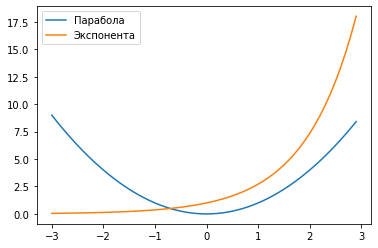

Wall time: 170 ms


In [868]:
%%time
x = np.arange(-3, 3, 0.1)
y1 = [i**2 for i in x]
y2 = [2.71**i for i in x]
plt.plot(x, y1, label='Парабола')
plt.plot(x, y2, label='Экспонента')
plt.legend()
plt.show()

In [ ]:
%reset -f